In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.integrate import cumtrapz
import os
import pandas as pd
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline
import hysteresis as hys

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

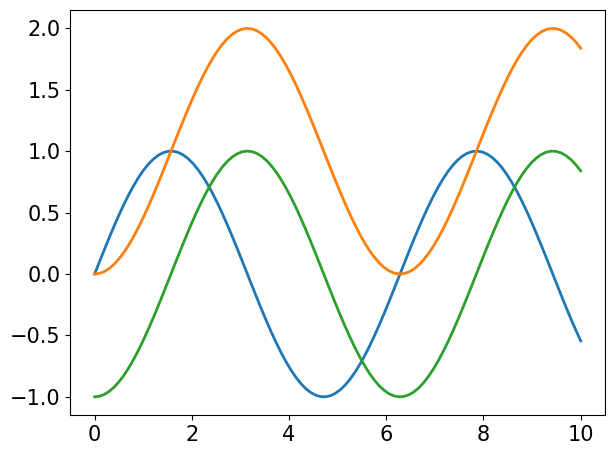

In [4]:
t = np.linspace(0,10,100)
y = np.sin(t)

integral_y = cumtrapz(y,t,initial=0)
plt.plot(t,y)
plt.plot(t,integral_y)
plt.plot(t,-np.cos(t))

In [5]:
temp = lambda R : (R-100)/0.385 + 273.15
lineal = lambda x,A,B : A*x+B

In [6]:
files = os.listdir('files/med2')

names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(float(files[i][:-4]))
names = np.sort(np.array(names))

T = 86.53968367004572


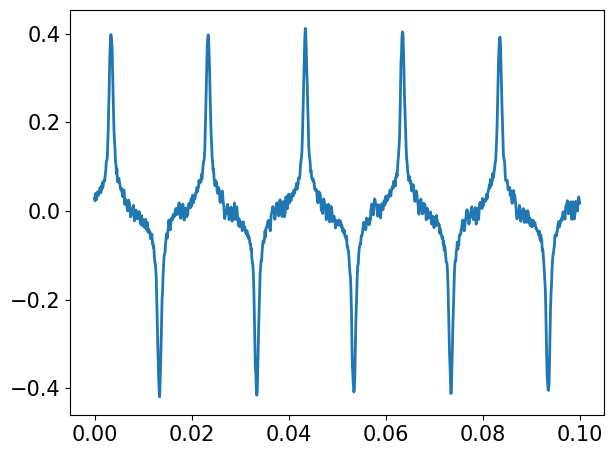

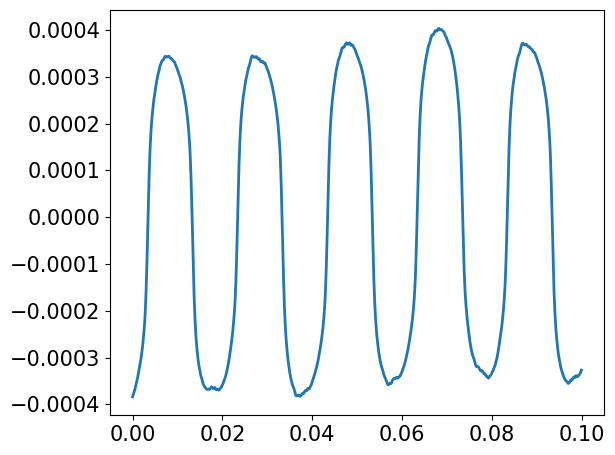

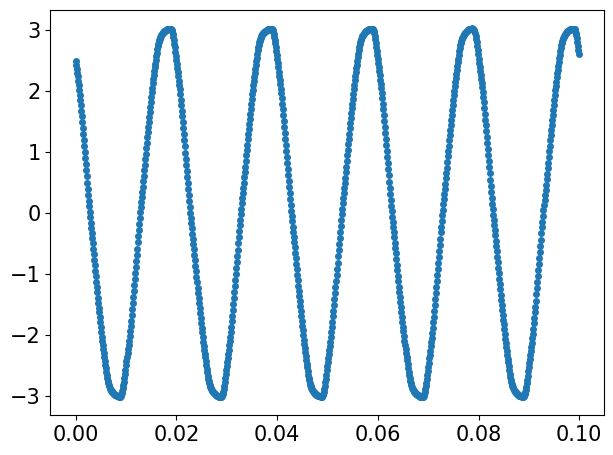

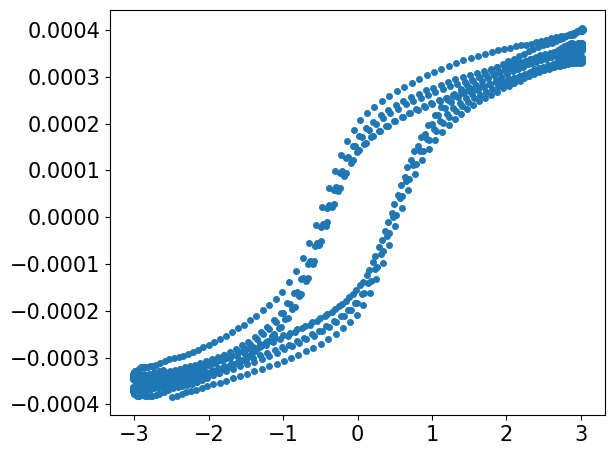

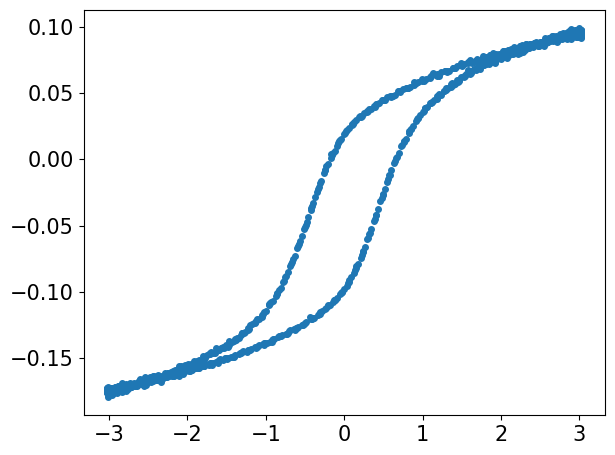

In [7]:
df = pd.read_csv(f'files/med2/{names[10]}.csv',index_col=0)

t = np.arange(len(df))/10000

integral = cumtrapz(df.V_Bnint,t,initial=0)

pars,cov = cf(lineal,df.V_pt/900,df.V_pr)
print(f'T = {temp(pars[0])}')

integral-=integral[df.V_Bnint == max(df.V_Bnint)]

plt.plot(t,df.V_Bnint)
plt.show()
plt.plot(t,integral)
plt.show()
plt.scatter(t,-df.V_H)
plt.show()
plt.scatter(df.V_H,integral)
plt.show()
plt.scatter(-df.V_H,df.V_B)

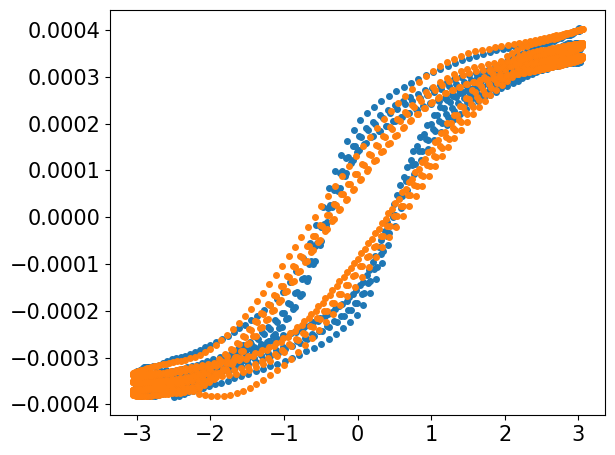

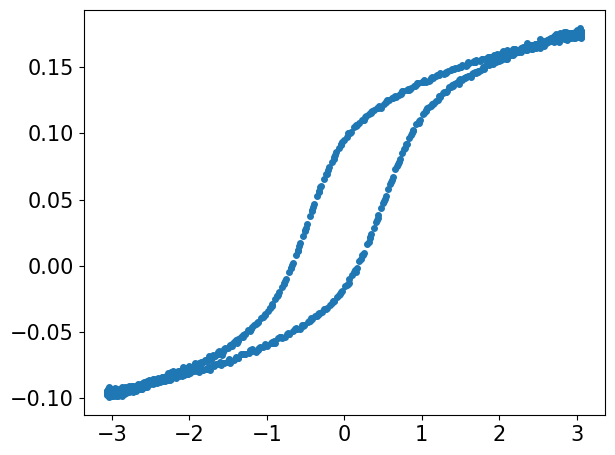

In [12]:
filtered_integral = savgol_filter(integral,51,3)
filtered_H = savgol_filter(df.V_H,51,3)
plt.scatter(df.V_H,integral)
plt.scatter(filtered_H,filtered_integral)

plt.show()

plt.scatter(filtered_H,-df.V_B)

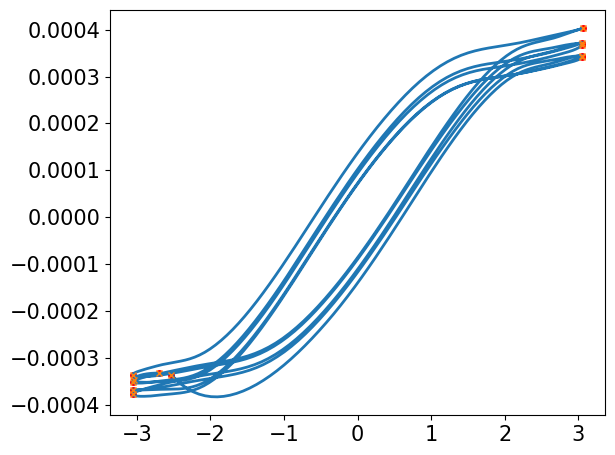

(array([0, 0]), array([0, 1]))
(array([81, 81]), array([0, 1]))
(array([181, 181]), array([0, 1]))
(array([281, 281]), array([0, 1]))
(array([381, 381]), array([0, 1]))
(array([481, 481]), array([0, 1]))
(array([581, 581]), array([0, 1]))
(array([681, 681]), array([0, 1]))
(array([781, 781]), array([0, 1]))
(array([881, 881]), array([0, 1]))
(array([981, 981]), array([0, 1]))
(array([999, 999]), array([0, 1]))


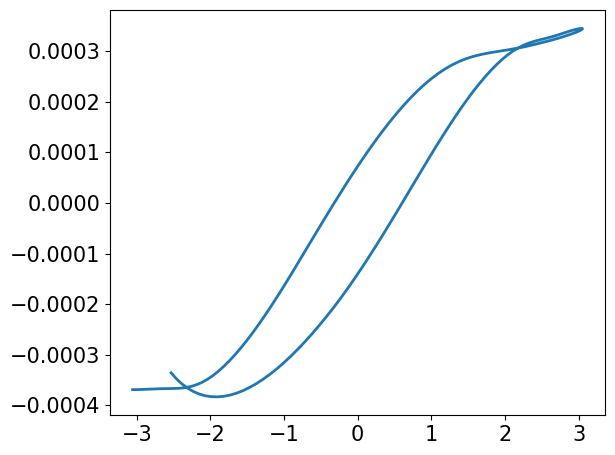

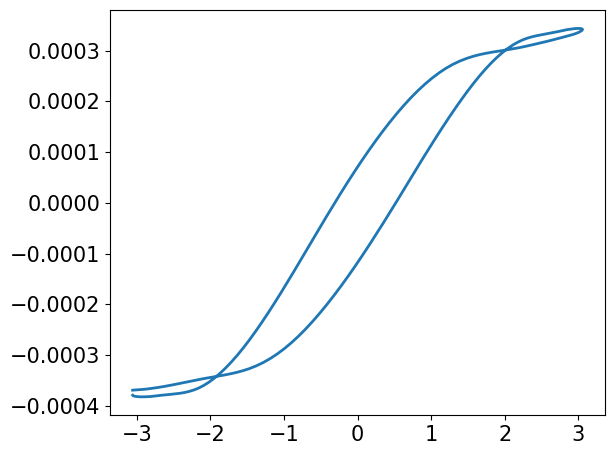

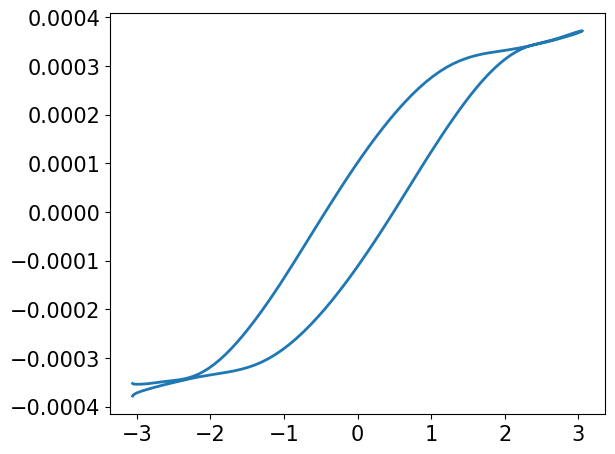

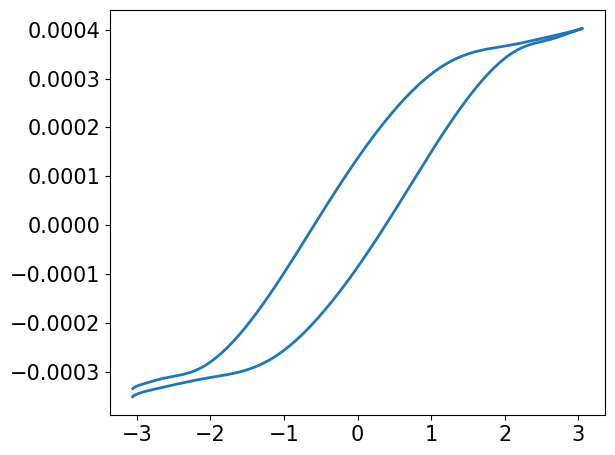

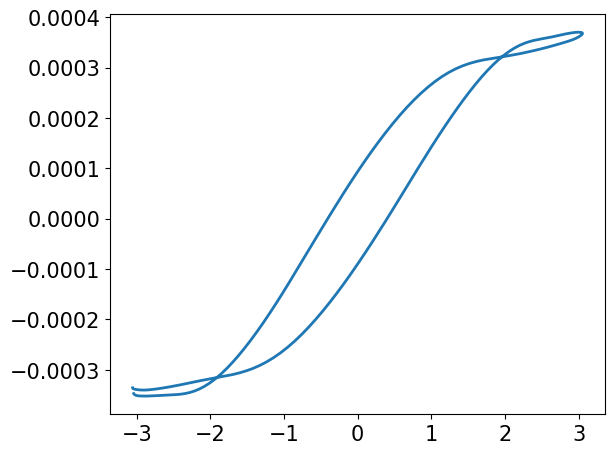

In [62]:
x = filtered_H
y = filtered_integral

xy = np.column_stack([x,y])


myHys = hys.Hysteresis(xy)
myHys.plot(showReversals = True)
reversals = myHys.getReversalxy().transpose()
plt.scatter(*reversals,color='r')
plt.show()

reversal_indices = []

for i in range(len(reversals.transpose())):
    idx = np.where(xy == reversals.transpose()[i])
    print(idx)
    if len(idx) > 0:
        reversal_indices.append(idx)

for i in range(1,len(reversal_indices)):
    if i % 2 == 0:
        plt.plot(*xy[reversal_indices[i-2][0][0]:reversal_indices[i][0][0]].transpose())
        plt.show()

#print(reversal_indices[2][0][0])
#plt.plot(*xy[0:181].transpose())